## 1. Pytorch

-   Python List: 행렬 연산을 위해 for 문 사용
-   Numpy : 차원이 다른 행렬 간에도 연산이 가능
-   Tensor : GPU 상에서 연산이 가능하고 autograd(자동 미분)연산 기능이 있는 자료형

In [1]:
import numpy as np, torch

### Tensor 생성 및 초기화

In [2]:
torch.empty(5,3) # 초기화되지 않은 행렬 생성

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
torch.rand(5,3) # 0 ~ 1 사이의 랜덤 초기화 행렬 생성

tensor([[0.3596, 0.1217, 0.8802],
        [0.8703, 0.6422, 0.7985],
        [0.6685, 0.2979, 0.1748],
        [0.6171, 0.3591, 0.8376],
        [0.9776, 0.5513, 0.6708]])

In [4]:
x = torch.rand(5,3)
print(x)

tensor([[0.9918, 0.8426, 0.6875],
        [0.5468, 0.1618, 0.6146],
        [0.4839, 0.3312, 0.5717],
        [0.9276, 0.7820, 0.7289],
        [0.5530, 0.3153, 0.0339]])


In [5]:
x.mean() # mean

tensor(0.5715)

In [6]:
x.std() # standard deviation

tensor(0.2739)

In [7]:
y = torch.randn(5,3) # normal distribution에서 랜덤 초기화 행렬 생성
print(y)

tensor([[ 4.7897e-04, -1.5892e+00, -2.4995e-01],
        [-6.9502e-01, -1.5240e+00,  7.9109e-01],
        [ 1.7649e-01, -6.7418e-01, -8.7057e-01],
        [-1.0247e-03, -3.7028e-01,  1.1097e+00],
        [ 1.9448e-02, -6.9819e-01, -1.0335e+00]])


In [8]:
y.mean()

tensor(-0.3739)

In [9]:
y.std()

tensor(0.7602)

In [10]:
x = torch.tensor([[1.2,4.5],[1,2]]) # 특정 값을 tensor로 만들기

In [11]:
x

tensor([[1.2000, 4.5000],
        [1.0000, 2.0000]])

### Tensor size & Numpy 변환

In [12]:
x.size() # 행렬의 size를 빠르게 확인 가능하다

torch.Size([2, 2])

In [13]:
x = torch.rand(3,4)
y = x.reshape(4,3)
z = x.reshape(-1,2) # -1개의 행이 아니라, 뒷 부분 숫자에 맞춰서 만들어 달라는 뜻이다.
# 데이터의 모형이 정확하지 않고 모호할 때 사용하면 좋다
print(x, x.size(), '\n', y, y.size, '\n', z, z.size)

tensor([[0.3817, 0.8386, 0.0245, 0.9193],
        [0.7061, 0.7995, 0.3346, 0.5173],
        [0.7172, 0.0486, 0.3007, 0.4337]]) torch.Size([3, 4]) 
 tensor([[0.3817, 0.8386, 0.0245],
        [0.9193, 0.7061, 0.7995],
        [0.3346, 0.5173, 0.7172],
        [0.0486, 0.3007, 0.4337]]) <built-in method size of Tensor object at 0x156569ef0> 
 tensor([[0.3817, 0.8386],
        [0.0245, 0.9193],
        [0.7061, 0.7995],
        [0.3346, 0.5173],
        [0.7172, 0.0486],
        [0.3007, 0.4337]]) <built-in method size of Tensor object at 0x156569bd0>


In [14]:
# Tensor to numpy
x = torch.ones(5)
y = x.numpy()
print(x, type(x))
print(y, type(y))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


In [15]:
# Numpy to tensor
x = np.ones(5)
y = torch.from_numpy(x)
print(x, type(x))
print(y, type(y))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64) <class 'torch.Tensor'>


### Tensor Autograd
* requires_grad를 true로 세팅하면 tensor에 대한 모든 연산 추적 가능

* 이를 통해 forward propagation 후, .backward() 호출 시 모든 gradient 자동으로 계산

In [16]:
x = torch.tensor(([1.,2.], [3.,4.,]), requires_grad = True)
print(x)
y = 3 * (x+2) ** 2
print(y)

out = y.sum()
print(out)

out.backward()
print(x.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
tensor(258., grad_fn=<SumBackward0>)
tensor([[18., 24.],
        [30., 36.]])


## 2. Pytorch Project

### Load Data

In [17]:
import torchvision
import numpy as np, torch

In [18]:
import torchvision.transforms as transforms

In [19]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

Files already downloaded and verified


In [20]:
#data check
image, label = train_data[0]
print(len(train_data), image.size(), label)

50000 torch.Size([3, 32, 32]) 6


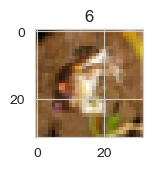

In [21]:
import matplotlib
import matplotlib.pyplot as plt

plt.subplot(141)
plt.imshow(image.permute(2,1,0))
plt.title(label)
plt.show()

### Define Dataloader

define dataloader (dataloader loads data from queue while iters loop)

In [22]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=64, #배치 사이즈 지정가능
                                          shuffle=True) # data set 순서를 바꿀 수 있다
#train data에서는 셔플을 True, test data에 대해서는 셔플 False 해야한다

In [23]:
# check how data loader works
print(len(data_loader))
for idx, (images, labels) in enumerate(data_loader):
    if idx ==3:
        break

    print(image.size(), len(images), labels)

782
torch.Size([3, 32, 32]) 64 tensor([9, 7, 6, 2, 6, 4, 8, 5, 0, 5, 0, 1, 3, 3, 7, 4, 0, 0, 9, 5, 9, 2, 8, 7,
        6, 2, 5, 8, 7, 6, 9, 8, 9, 6, 0, 9, 1, 7, 1, 6, 8, 6, 3, 5, 9, 1, 8, 9,
        8, 5, 6, 3, 2, 4, 4, 8, 6, 0, 8, 8, 0, 0, 4, 2])
torch.Size([3, 32, 32]) 64 tensor([9, 7, 7, 0, 6, 8, 1, 6, 3, 4, 5, 7, 1, 2, 2, 9, 3, 7, 6, 6, 4, 3, 9, 8,
        4, 7, 3, 5, 1, 5, 8, 1, 4, 1, 0, 5, 4, 6, 8, 8, 3, 7, 9, 4, 0, 6, 8, 3,
        3, 0, 8, 6, 4, 9, 2, 5, 6, 7, 2, 8, 8, 7, 4, 7])
torch.Size([3, 32, 32]) 64 tensor([1, 1, 8, 8, 0, 3, 3, 2, 7, 1, 1, 1, 9, 7, 8, 1, 1, 8, 7, 7, 2, 1, 5, 1,
        5, 2, 6, 7, 4, 6, 7, 2, 9, 8, 3, 4, 0, 0, 3, 3, 8, 5, 1, 2, 6, 7, 0, 4,
        5, 7, 1, 6, 9, 9, 4, 8, 1, 8, 2, 2, 2, 3, 0, 3])


### Define Model

In [24]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
class Net(nn.Module) :
    def __init__(self) :
        super(Net, self).__init__()
        self.layer1 = nn.Sequential( # 시퀀스 : 밑에 있는 코드를 한번에 다 묶는 것
            nn.Conv2d(3,6,5), # 3 = input ch, 6 = output ch, 5 = kernel size -> [6,28,28]
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2,2) # -> [6,14,14]
        )
        self.fc = nn.Linear(6 * 14 * 14, 10) # 6 * 14 * 14가 왼쪽에 있는 0의 개수, 10이 오른쪽에 있는 0의 개수
        
    def forward(self, x) :
        out = self.layer1(x)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out
    
model = Net() # instance

In [26]:
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1176, out_features=10, bias=True)
)


### Set Loss & Optimizer

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [28]:
epochs = 1
for epoch in range(epochs):
    for i, (images, labels) in enumerate(data_loader):
        # Forward Propagate
        outputs = model(images)

        # Get Loss, Compute Gradients, Update Parameters
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # optimizer를 기반으로 다시 반복을 하게된다

        if i % 50 == 0 or (i+1)==len(data_loader):
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, 
                                                                     len(data_loader), loss.item()))

Epoch [1/1], Step [1/782], Loss: 2.4657
Epoch [1/1], Step [51/782], Loss: 2.2430
Epoch [1/1], Step [101/782], Loss: 2.1570
Epoch [1/1], Step [151/782], Loss: 2.0998
Epoch [1/1], Step [201/782], Loss: 2.0746
Epoch [1/1], Step [251/782], Loss: 2.0618
Epoch [1/1], Step [301/782], Loss: 2.0591
Epoch [1/1], Step [351/782], Loss: 1.9024
Epoch [1/1], Step [401/782], Loss: 2.0664
Epoch [1/1], Step [451/782], Loss: 2.1349
Epoch [1/1], Step [501/782], Loss: 2.0601
Epoch [1/1], Step [551/782], Loss: 1.9691
Epoch [1/1], Step [601/782], Loss: 2.0375
Epoch [1/1], Step [651/782], Loss: 1.9629
Epoch [1/1], Step [701/782], Loss: 1.8042
Epoch [1/1], Step [751/782], Loss: 1.8958
Epoch [1/1], Step [782/782], Loss: 1.8617


### Save & Visualization

In [29]:
torch.save(model.state_dict(), 'my_model.pth')

In [30]:
! ls

Day1.ipynb   Day2.ipynb   Day3.ipynb   Day4.ipynb   datasets     my_model.pth


## 3. XOR Algorithm

In [31]:
x = torch.tensor([[0.,0.],[0.,1.], [1.,0.], [1.,1.]])
y = torch.tensor([0.,1.,1.,0.]).view(-1,1)

In [32]:
y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

In [33]:
x

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [34]:
class XOR_net(nn.Module):
    def __init__(self):
        super(XOR_net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(2,1),
            nn.Tanh()
        )
        self.layer2 = nn.Sequential(
            nn.Linear(2,3),
            nn.Tanh(),
            nn.Linear(3,1),
            nn.Tanh()
        )

    def forward(self, input, num_layer):
        if num_layer == 1 : out = self.layer1(input)
        elif num_layer == 2 : out = self.layer2(input)
        else : print("out of range") ; raise
        return out

In [35]:
net = XOR_net()

In [36]:
print(net)

XOR_net(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Tanh()
  )
  (layer2): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=1, bias=True)
    (3): Tanh()
  )
)


learning rate, loss function을 전부 편하게 지정할 수 있다.

In [37]:
learning_rate = 0.05
epochs = 10000
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)

error1, error2 = [], []

In [38]:
for epoch in range(epochs):
    for i, (input, ans) in enumerate(zip(x,y)):
        output1 = net(input,1)
        output2 = net(input,2)

        loss1 = criterion(output1, ans)
        loss2 = criterion(output2, ans)

        optimizer.zero_grad()
        loss1.backward()
        loss2.backward()
        optimizer.step()

        error1.append(loss1.detach().numpy())
        error2.append(loss2.detach().numpy())

    if epoch % 500 == 0 or (epoch+1)==epochs:
        print('Epoch [{}/{}] Loss1: {:.4f} Loss2: {:.4f}'.format(epoch+1, epochs, loss1, loss2))

Epoch [1/10000] Loss1: 0.1889 Loss2: 0.1327
Epoch [501/10000] Loss1: 0.3282 Loss2: 0.0009
Epoch [1001/10000] Loss1: 0.3042 Loss2: 0.0000
Epoch [1501/10000] Loss1: 0.3017 Loss2: 0.0000
Epoch [2001/10000] Loss1: 0.3015 Loss2: 0.0000
Epoch [2501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [3001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [3501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [4001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [4501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [5001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [5501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [6001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [6501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [7001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [7501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [8001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [8501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [9001/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [9501/10000] Loss1: 0.3014 Loss2: 0.0000
Epoch [10000/10000] Loss1: 0.3014 Loss2: 0.0000


In [39]:
# Test after train (Tanh, MSELoss)
for input, target in zip (x, y):
    output1 = net(input,1)
    output2 = net(input,2)
    print("input: ",input, "layer1: ", output1.data, "\tlayer2: ", output2.data, "\tanswer:", target)

input:  tensor([0., 0.]) layer1:  tensor([0.5490]) 	layer2:  tensor([8.3923e-05]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5217]) 	layer2:  tensor([0.9931]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4932]) 	layer2:  tensor([0.9898]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4636]) 	layer2:  tensor([4.7684e-05]) 	answer: tensor([0.])


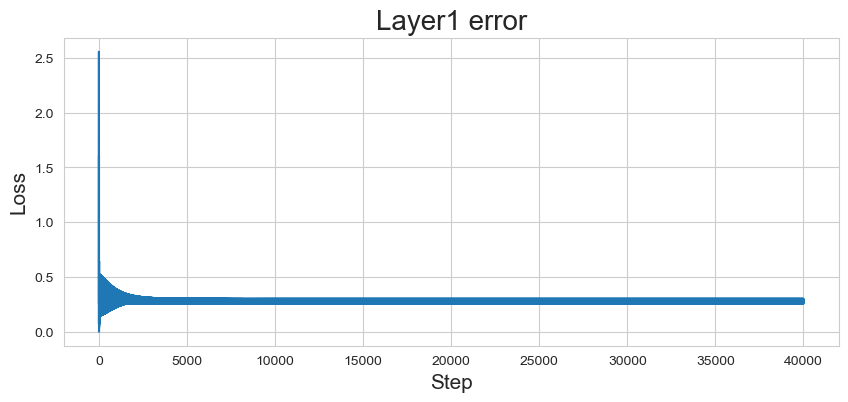

In [40]:
import seaborn as sns
plt.figure(figsize = (10,4))
plt.plot(error1)
plt.title("Layer1 error", fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.show()

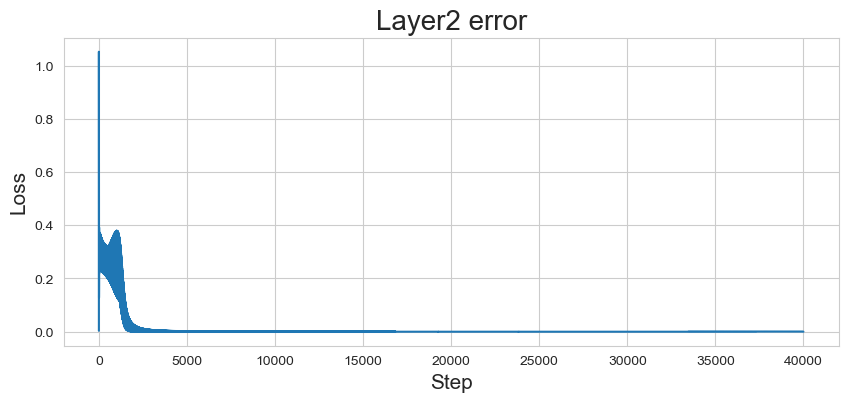

In [41]:
plt.figure(figsize = (10,4))
plt.plot(error2)
plt.title("Layer2 error", fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Step', fontsize = 15)
plt.show()

In [42]:
# Test after train (sigmoid, BCELoss)
for input, target in zip (x, y):
    output1 = net(input,1)
    output2 = net(input,2)
    print("input: ",input, "layer1: ", output1.data, "\tlayer2: ", output2.data, "\tanswer:", target)

input:  tensor([0., 0.]) layer1:  tensor([0.5490]) 	layer2:  tensor([8.3923e-05]) 	answer: tensor([0.])
input:  tensor([0., 1.]) layer1:  tensor([0.5217]) 	layer2:  tensor([0.9931]) 	answer: tensor([1.])
input:  tensor([1., 0.]) layer1:  tensor([0.4932]) 	layer2:  tensor([0.9898]) 	answer: tensor([1.])
input:  tensor([1., 1.]) layer1:  tensor([0.4636]) 	layer2:  tensor([4.7684e-05]) 	answer: tensor([0.])
